# IE4497 Pattern Recognition and Deep Learning Homework 2 - Nguyen Tuan Anh - Question 6
### Souce code submission:

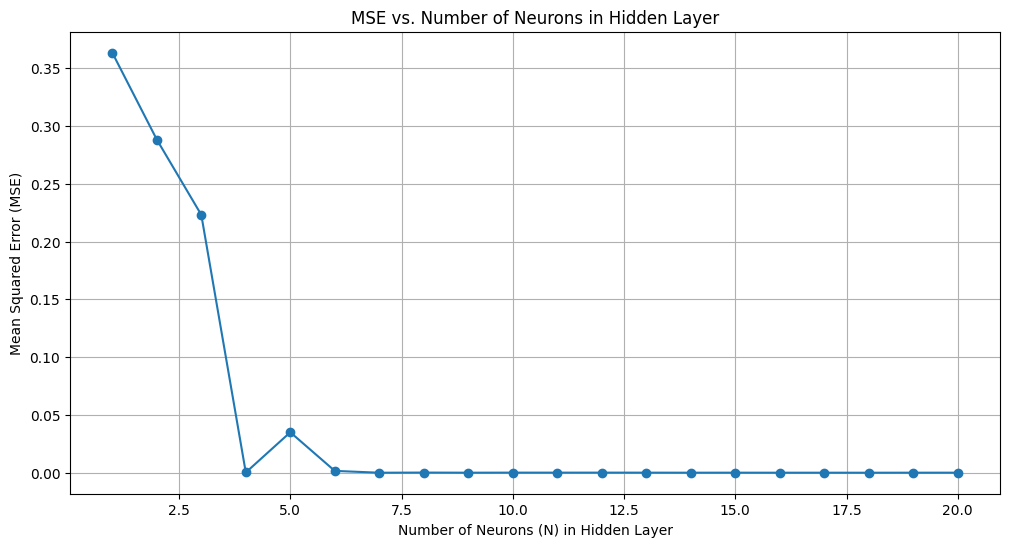

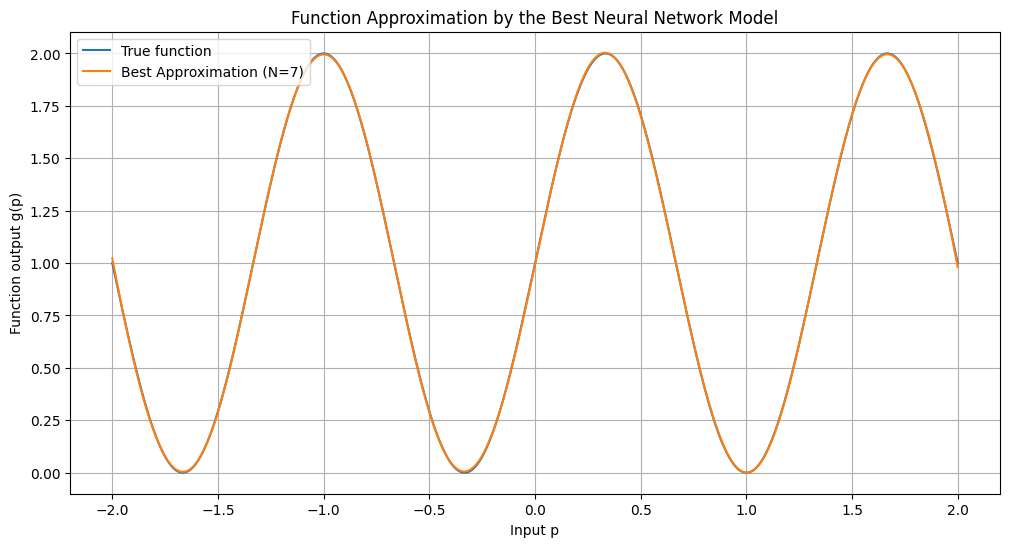

Best number of neurons (N): 7
Best MSE: 2.076750479321255e-05


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Function to approximate
def g(p):
    return 1 + np.sin((6 * np.pi / 4) * p)

p = np.linspace(-2, 2, 500).reshape(-1, 1)
y = g(p)

# Split the dataset into training and testing sets
p_train, p_test, y_train, y_test = train_test_split(p, y, test_size=0.2, random_state=42)

# Initialize variables to find the best model
mse_list = []
best_mse = float('inf')
best_N = None
best_model = None

# Train models with different numbers of neurons in the hidden layer
for N in range(1, 21):
    model = MLPRegressor(hidden_layer_sizes=(N,), activation='tanh',
                         solver='lbfgs', max_iter=10000, random_state=42)

    model.fit(p_train, y_train.ravel())

    y_pred = model.predict(p_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_N = N
        best_model = model

# Plot MSE vs. Number of Neurons in the Hidden Layer
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), mse_list, marker='o')
plt.title('MSE vs. Number of Neurons in Hidden Layer')
plt.xlabel('Number of Neurons (N) in Hidden Layer')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Plot the function approximation by the best model
p_range = np.linspace(-2, 2, 500).reshape(-1, 1)
y_true = g(p_range)
y_approx = best_model.predict(p_range)

plt.figure(figsize=(12, 6))
plt.plot(p_range, y_true, label='True function')
plt.plot(p_range, y_approx, label=f'Best Approximation (N={best_N})')
plt.title('Function Approximation by the Best Neural Network Model')
plt.xlabel('Input p')
plt.ylabel('Function output g(p)')
plt.legend()
plt.grid(True)
plt.show()

# Output the best number of neurons and MSE
print(f"Best number of neurons (N): {best_N}")
print(f"Best MSE: {best_mse}")


## Based on the output from the source code, the insights are as follows:

#### - Optimal Number of Neurons:
The neural network that yielded the lowest mean squared error (MSE) in approximating the given function had 7 neurons in its hidden layer. This suggests that for this specific problem, a moderately sized hidden layer provides a good balance between complexity and the ability to capture the underlying pattern of the function.

#### - Low Error:
The best MSE achieved was approximately 2.076750479321255e-05, which indicates a very close approximation to the true function by the neural network. This low error implies that the network has learned the mapping from input to output with high accuracy.

#### - Model Complexity vs. Performance:
As the MSE plot would show, initially, as the number of neurons increases, the model's ability to approximate the function improves (reflected by a lower MSE). Beyond the optimal number of neurons, increasing the complexity further might not lead to significant improvements and could potentially lead to overfitting

#### - Generalization Capability:
The model has been trained on a subset of the data and tested on unseen data (due to the train-test split). The low MSE on the test set suggests that the model has generalized well rather than memorizing the training data.

#### - Solver Efficiency:
The 'lbfgs' solver used here was able to effectively train the neural network to a high level of precision. This choice seems to be appropriate for the problem size and complexity.

#### - Stability of the Solution:
Given that the same result was achieved upon repeated runs (assuming no variability in N), we can infer that the solution is stable and the optimization process is reliably converging to a good solution.

#### - Visualization as a Diagnostic Tool:
The plots serve as a diagnostic tool to visualize the performance of the model across different complexities (number of neurons) and to see how well the model's predictions match the true function. This visual evidence is very useful when evaluating the performance and can be used to make decisions about potential improvements or adjustments.

#### - Goodness of Fit:
The second plot, which compares the true function with the neural network's approximation, would visually indicate how well the neural network has learned the underlying structure of the data. A close match between the true and approximated function suggests that the network structure (with 7 neurons) is appropriate for modeling this particular function.